In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [41]:
df = pd.read_csv('crypto_data.csv', index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [42]:
print(df.shape)

(1252, 6)


In [43]:
df = df.loc[df['IsTrading'] == True]
print(df.shape)
df.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [44]:
# df = df.drop('IsTrading',axis=1)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [45]:
df = df.dropna()
print(df.shape)


(685, 6)


In [46]:
df = df[df['TotalCoinsMined'] > 0]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [47]:
print(df.shape)

(532, 6)


In [53]:
coins_df = pd.DataFrame(df['CoinName']).reset_index(drop=True)
coins_df.head()

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum


In [10]:
df = df.drop('CoinName',axis=1)

In [11]:
df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethash,True,PoW,1.076842e+08,0


In [12]:
X = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
X.shape

(532, 99)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0] # first row of X dataframe with 98 columns (features)

array([ 0.        , -0.11710817, -0.1528703 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.07530656, -0.0433963 , -0.06142951,
       -0.06142951, -0.0433963 , -0.0433963 , -0.19245009, -0.06142951,
       -0.09740465, -0.0433963 , -0.11547005, -0.07530656, -0.0433963 ,
       -0.0433963 , -0.15191091, -0.0433963 , -0.13118084, -0.0433963 ,
       -0.0433963 , -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.0433963 , -0.08703883, -0.08703883,
       -0.08703883, -0.0433963 , -0.13118084, -0.13840913, -0.13840913,
       -0.0433963 , -0.06142951, -0.0433963 , -0.07530656, -0.18168574,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.07530656, -0.15826614,
       -0.31491833, -0.0433963 , -0.08703883, -0.07530656, -0.06142951,
        1.38675049, -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.39879994, -0.0433963 , -0.18

In [14]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca.shape

# from 98 features (columns) to 74 columns (features)

(532, 74)

In [15]:
pca.explained_variance_.sum()

88.47283457566157

In [16]:
pca2 = PCA(n_components=3)
princ_comps=pca2.fit_transform(X_scaled)

pca2.explained_variance_ratio_

array([0.02793099, 0.02134802, 0.02049639])

In [17]:
titles = [f"PC {i}" for i in range(1, 75)]

In [18]:
crypto_pca_df = pd.DataFrame (
    data=crypto_pca, columns=titles, index=df.index
)
crypto_pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 65,PC 66,PC 67,PC 68,PC 69,PC 70,PC 71,PC 72,PC 73,PC 74
42,-0.335099,1.032189,-0.590713,0.001397,-0.000000e+00,-1.722884e-24,1.481754e-24,-0.007129,-1.319756,-0.051813,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
404,-0.318434,1.032331,-0.591126,0.001386,-1.333025e-16,2.148874e-16,-8.698158e-18,-0.007739,-1.322514,-0.056674,...,-7.778035e-17,-5.143221e-16,-1.622138e-16,2.168688e-16,1.748535e-17,7.767580e-17,-2.025061e-16,-3.124520e-16,2.655928e-16,4.994446e-17
1337,2.305468,1.656383,-0.683617,0.004731,3.506595e-14,-7.553262e-15,5.876044e-14,-0.054781,-1.542879,-0.943951,...,-1.179799e-14,-1.565860e-15,-5.184503e-15,-5.038000e-14,-1.419742e-14,-1.924029e-14,1.231862e-14,-4.081679e-14,-1.878432e-14,1.448362e-15
BTC,-0.145184,-1.320593,0.192813,-0.001229,-6.968981e-15,1.771873e-15,-1.108060e-14,-0.002071,0.281463,0.251862,...,-3.931259e-15,9.732569e-15,-3.421315e-15,-3.663316e-15,-6.054378e-15,-7.071270e-15,6.432775e-16,-5.877683e-15,5.125329e-15,-1.189263e-14
ETH,-0.151768,-2.036192,0.396182,-0.001705,-1.499181e-14,1.240723e-16,-2.075102e-14,0.027735,0.519099,0.188820,...,-7.246019e-14,9.745477e-14,-2.580089e-14,-5.476230e-14,-3.700240e-15,-3.586226e-14,-2.691794e-14,-3.535038e-14,6.193336e-14,-1.250986e-13


In [19]:
# reduce dimensions using TSNE
tsne = TSNE()

In [32]:
crypto = tsne.fit_transform(crypto_pca)
crypto.shape

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

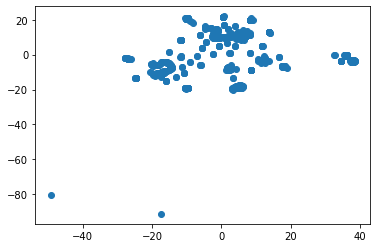

In [33]:
x = crypto[:,0]
y = crypto[:,1]
plt.scatter(x,y)
plt.show()

In [34]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,219272.500000
1,2,128790.078125
2,3,74271.312500
3,4,44788.062500
4,5,32466.871094


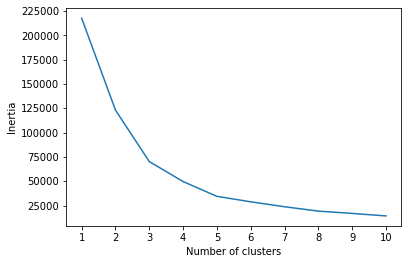

In [28]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

If we look at the data and model, we can create four clusters

Below we will see if we can see which currencies might be clustered together

In [35]:
crypto_df = pd.DataFrame(crypto)
crypto_df.head()

,0,1
0,-18.858944,-11.217250
1,-17.116007,-4.276703
2,-26.047668,-2.699979
3,37.810680,-4.301638
4,0.563830,21.774137


In [39]:
model = KMeans(n_clusters=4, random_state=0)

# Train the model
model.fit(crypto)

# Predict clusters
predictions = model.predict(crypto)

# Create return DataFrame with predicted clusters
crypto_df["class"] = model.labels_

predictions

array([2, 2, 2, 3, 0, 0, 1, 0, 0, 0, 1, 0, 3, 3, 0, 2, 1, 0, 2, 2, 0, 0,
       3, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 1, 2, 0,
       3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 0, 3, 2, 1, 3, 3, 3, 1, 2,
       2, 0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 1, 0, 3, 2, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 2, 1, 0, 3, 2,
       1, 1, 0, 0, 1, 0, 2, 0, 3, 2, 1, 3, 2, 0, 0, 3, 1, 0, 3, 3, 2, 2,
       1, 1, 0, 0, 0, 1, 1, 3, 0, 1, 0, 1, 1, 3, 3, 2, 1, 0, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 2, 0, 3, 3, 1, 2, 0, 2, 0, 1, 3, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2,
       1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 2, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       3, 1, 0, 1, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 3, 1,

In [40]:
crypto_df

,0,1,class
0,-18.858944,-11.217250,2
1,-17.116007,-4.276703,2
2,-26.047668,-2.699979,2
3,37.810680,-4.301638,3
4,0.563830,21.774137,0
...,...,...,...
527,32.833618,-0.459795,3
528,-14.677232,-6.862015,2
529,-10.197615,20.439137,0
530,8.308333,20.082415,0


In [54]:
# add the coin names to the crypto df with classes for clustering

crypto_clusters_df = pd.concat([coins_df, crypto_df],axis=1)
crypto_clusters_df.head()

,CoinName,0,1,class
0,42 Coin,-18.858944,-11.217250,2
1,404Coin,-17.116007,-4.276703,2
2,EliteCoin,-26.047668,-2.699979,2
3,Bitcoin,37.810680,-4.301638,3
4,Ethereum,0.563830,21.774137,0


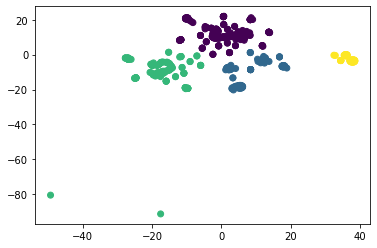

In [55]:
plt.scatter(crypto_clusters_df[0],crypto_clusters_df[1],c=crypto_clusters_df['class'])
plt.show()